In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import datetime as dt
import time
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [4]:
data = pd.read_csv('vaccination.csv')
data['date'] = pd.to_datetime(data['date'])
countries = list(data['country'].unique())
vaccines_name = list(data['vaccines'].unique())

data_ld = pd.DataFrame()
for country in countries:
    temp = data[data['country']==country].reset_index(drop=True)
    temp = temp.iloc[-1, :]
    data_ld = data_ld.append(temp, ignore_index=True)
data_ld = data_ld[data_ld['country'] != 'United Kingdom']

In [9]:
print(data_ld)

         country  daily_vaccinations  daily_vaccinations_per_million  \
0    Afghanistan              3000.0                            77.0   
1        Albania             10301.0                          3579.0   
2        Algeria              3748.0                            85.0   
3        Andorra               542.0                          7015.0   
4         Angola             10939.0                           333.0   
..           ...                 ...                             ...   
175    Venezuela             15200.0                           535.0   
176      Vietnam               849.0                             9.0   
177        Wales             27919.0                          8855.0   
178       Zambia               106.0                             6.0   
179     Zimbabwe             13172.0                           886.0   

     daily_vaccinations_raw       date  iso_code  people_fully_vaccinated  \
0                       NaN 2021-04-07       AFG          

In [10]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


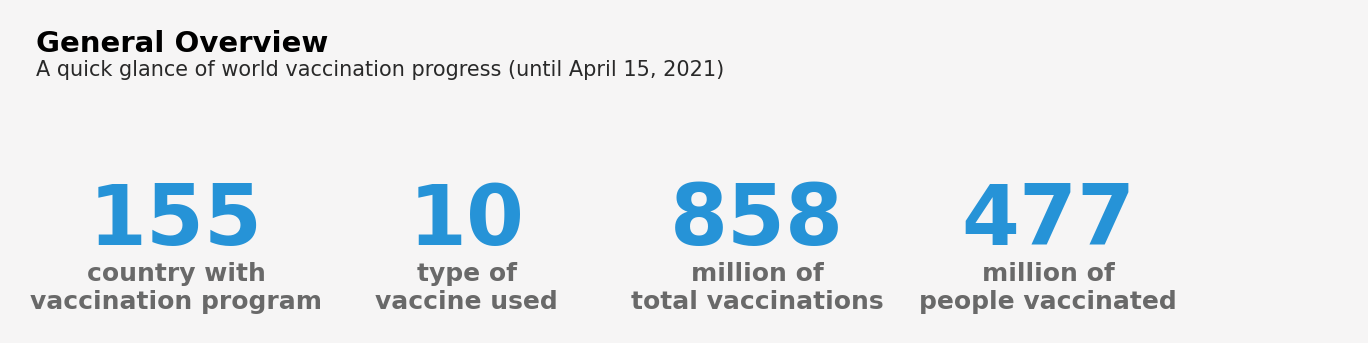

In [415]:
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(5, 1), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)

background_color = "#f6f5f5"

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["top","right", 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.9, 'General Overview', color='black', fontsize=7, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.89, 'A quick glance of world vaccination progress (until April 15, 2021)', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(0, 0, '155', color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nvaccination program', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.25, 0, '10', color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.25, 0, 'type of\nvaccine used', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.5, 0, '858', color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.5, 0, 'million of\ntotal vaccinations', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
ax0.text(0.75, 0, '477', color='#2693d7', fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.75, 0, 'million of\npeople vaccinated', color='dimgray', fontsize=6, ha='center', va='top', weight='bold')
plt.show()

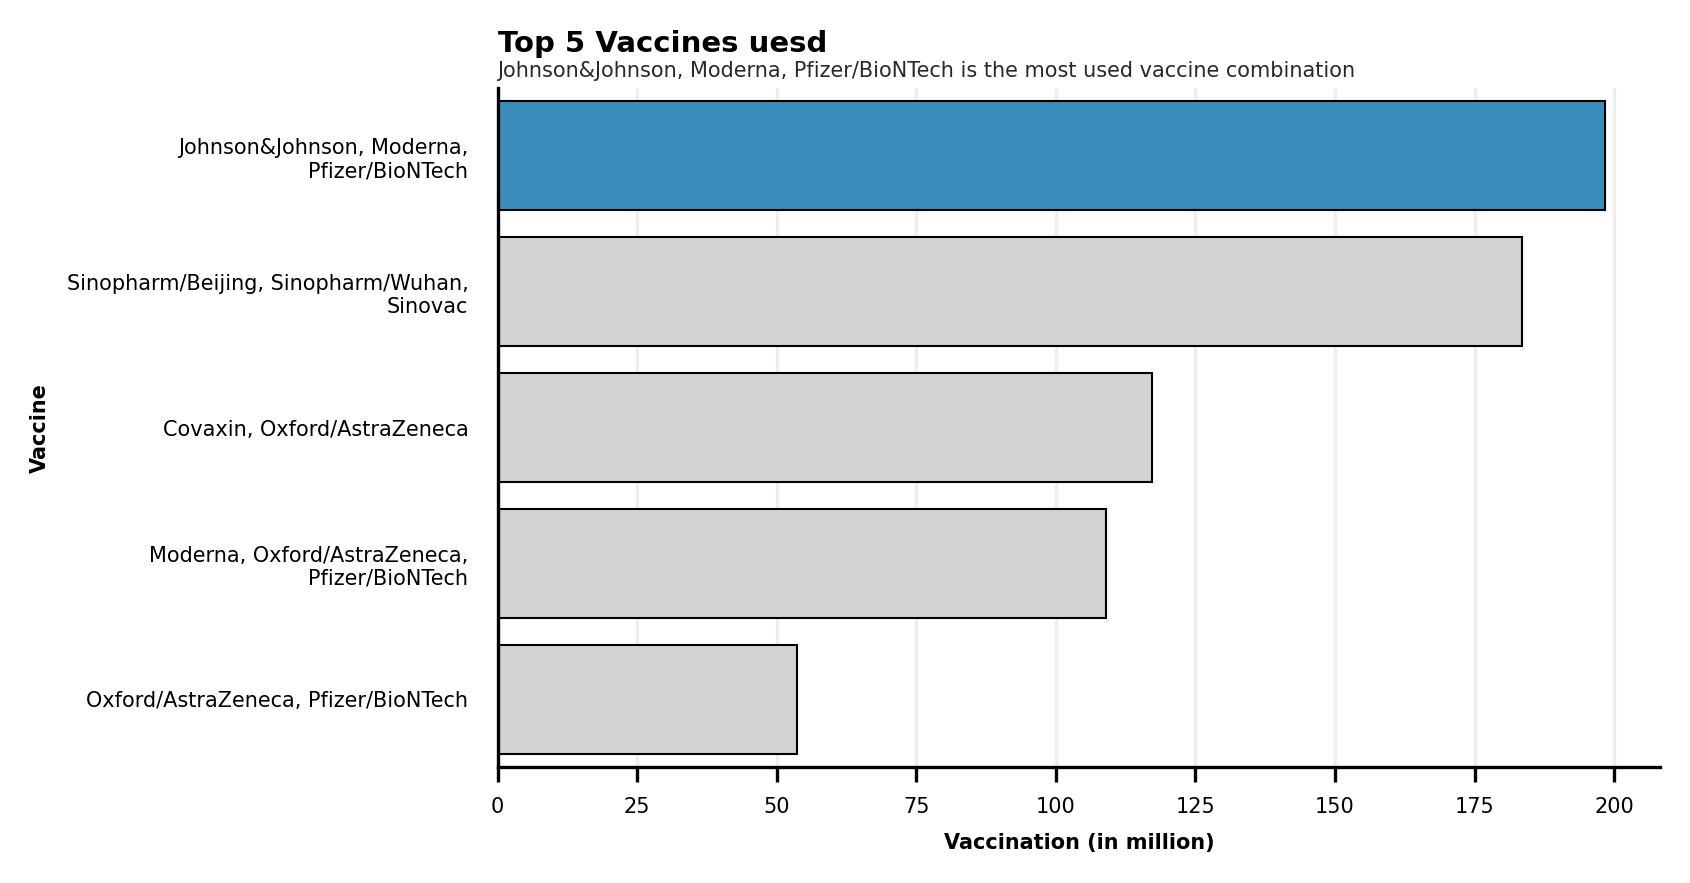

In [9]:
comb_vaccine = data_ld.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False)
comb_vaccine = comb_vaccine/1000000
comb_vaccine = comb_vaccine[:5]

# background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(26)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 3))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
# ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(0, -0.72, 'Top 5 Vaccines uesd', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.7, 'Johnson&Johnson, Moderna, Pfizer/BioNTech is the most used vaccine combination', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, y=comb_vaccine.index, x=comb_vaccine, zorder=2, orient='h', linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Vaccination (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccine",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.set_yticklabels([textwrap.fill(e, 35) for e in comb_vaccine.index])

plt.show()

date
2020-12-14     0.000000
2020-12-15     0.000718
2020-12-16     0.192366
2020-12-17     0.193256
2020-12-18     0.193649
                ...    
2021-04-11    17.833982
2021-04-12    18.205600
2021-04-13    18.569461
2021-04-14    18.327732
2021-04-15    15.418357
Name: daily_vaccinations, Length: 123, dtype: float64
DatetimeIndex(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23',
               ...
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15'],
              dtype='datetime64[ns]', name='date', length=123, freq=None)


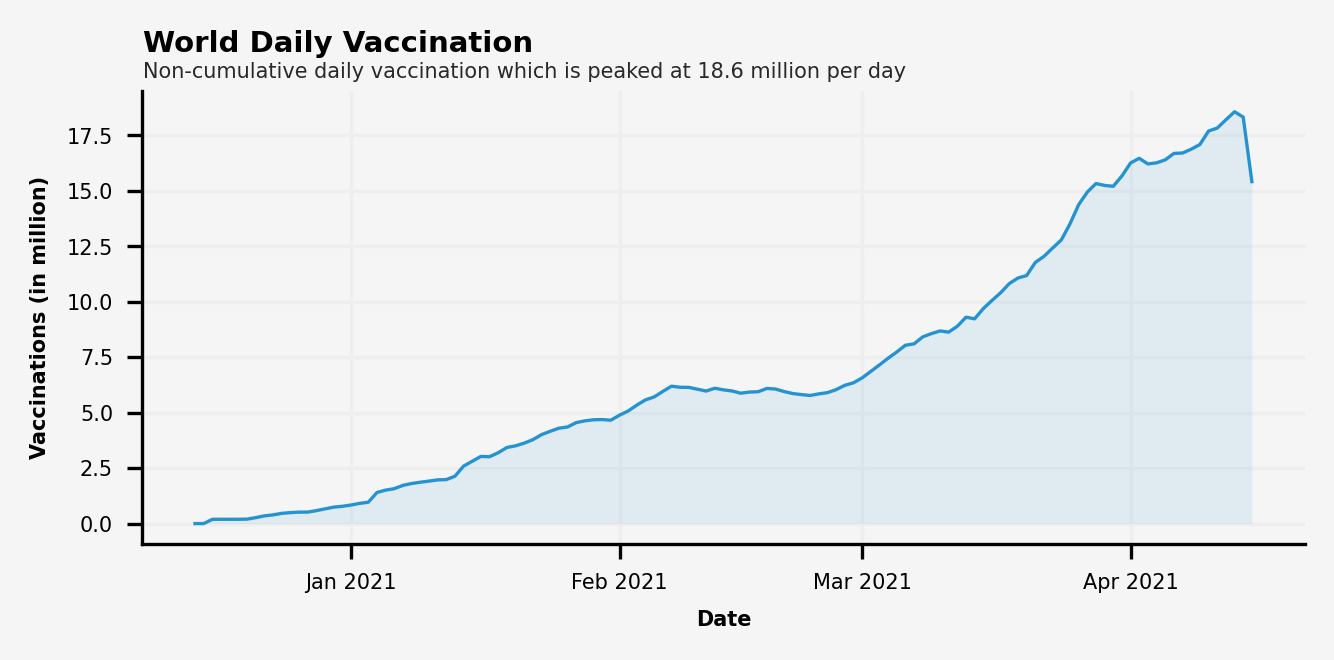

In [277]:
daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000
print(daily_vaccination)
print(daily_vaccination.index)
background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-8'), 21, 'World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-8'), 20.8, 'Non-cumulative daily vaccination which is peaked at 18.6 million per day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination, zorder=2, linewidth=0.8)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.fill_between(daily_vaccination.index, daily_vaccination, color='#2693d1', zorder=2, linewidth=0, alpha=0.1)

plt.show()

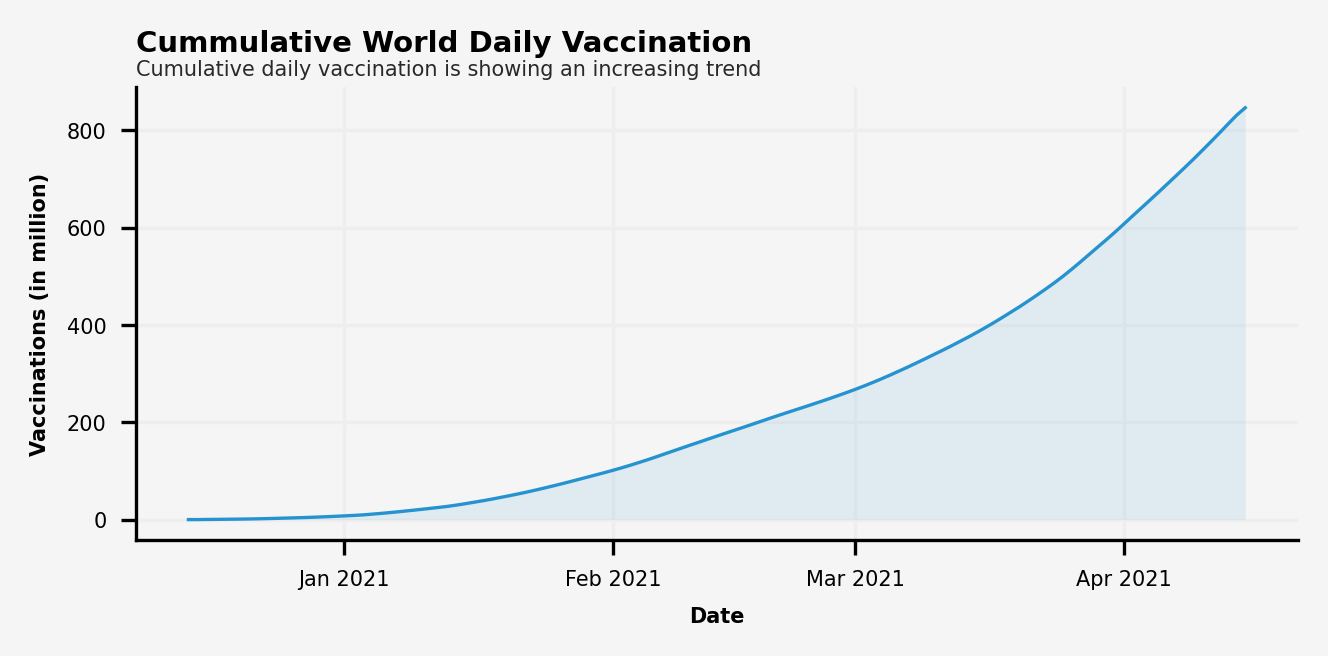

In [26]:
daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000

background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-8'), 950, 'Cummulative World Daily Vaccination', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-8'), 945, 'Cumulative daily vaccination is showing an increasing trend', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=daily_vaccination.index, y=daily_vaccination.cumsum(), zorder=2, color='#2693d1', linewidth=0.8)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.fill_between(daily_vaccination.index, daily_vaccination.cumsum(), color='#2693d1', zorder=2, alpha=0.1, linewidth=0)
plt.show()

In [431]:
data = pd.read_csv('vaccination.csv')
vaccine = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

trace = go.Choropleth(
            locations = vaccine['Country'],
            locationmode='country names',
            z = vaccine['Total vaccinations'],
            text = vaccine['Country'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'blues',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Number',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of vaccinations in the world',
    title_x = 0.46,
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

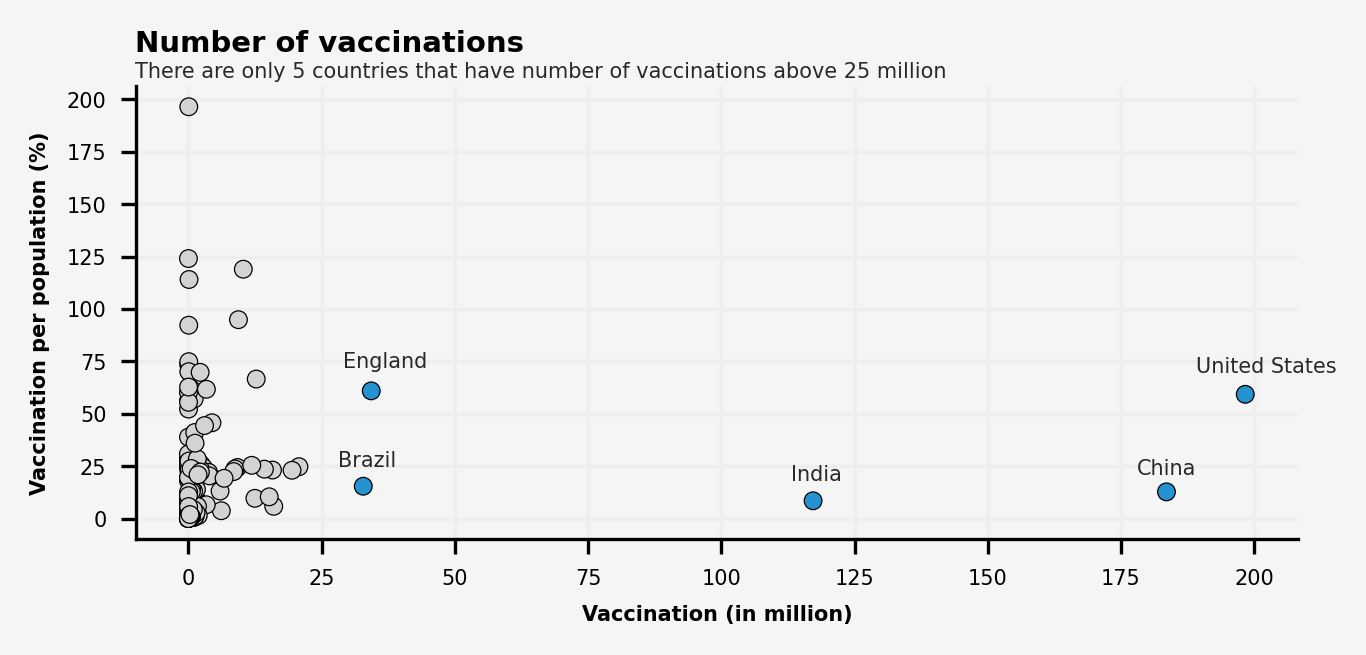

In [432]:
background_color = "#f6f5f5"

color_map = ["lightgray" for _ in range(2)]
color_map[1] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))
value_list = ['United States', 'England', 'India', 'China', 'Brazil']
boolean_series = data_ld.country.isin(value_list)
data_ld['color'] = boolean_series

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-10, 220, 'Number of vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-10, 218, 'There are only 5 countries that have number of vaccinations above 25 million', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(189, 68, 'United States', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(178, 19, 'China', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(113, 16, 'India', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(29, 70, 'England', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(28, 23, 'Brazil', color='#292929', fontsize=5, ha='left', va='bottom')
ax0_sns = sns.scatterplot(ax=ax0, y=data_ld['total_vaccinations_per_hundred'], x=data_ld['total_vaccinations']/1000000, 
                          zorder=2, linewidth=0.3, edgecolor='black',  hue=data_ld['color'], legend=False, size=1)
ax0_sns.set_xlabel("Vaccination (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccination per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

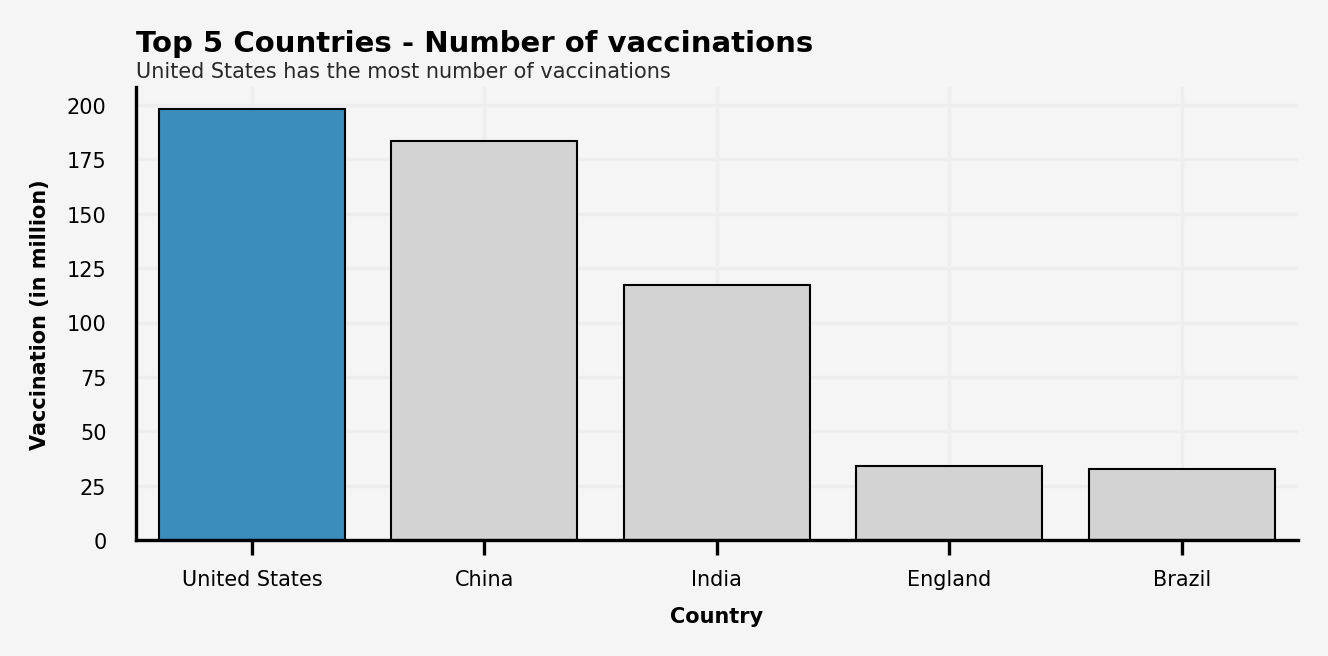

In [433]:
top5_countries_total_vaccination = data_ld.sort_values('total_vaccinations', ascending=False)
top5_countries_total_vaccination = top5_countries_total_vaccination[:5]
top5_countries_total_vaccination

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 222, 'Top 5 Countries - Number of vaccinations', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 220, 'United States has the most number of vaccinations', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_total_vaccination['country'], 
                      y=top5_countries_total_vaccination['total_vaccinations']/1000000, zorder=2, linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccination (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

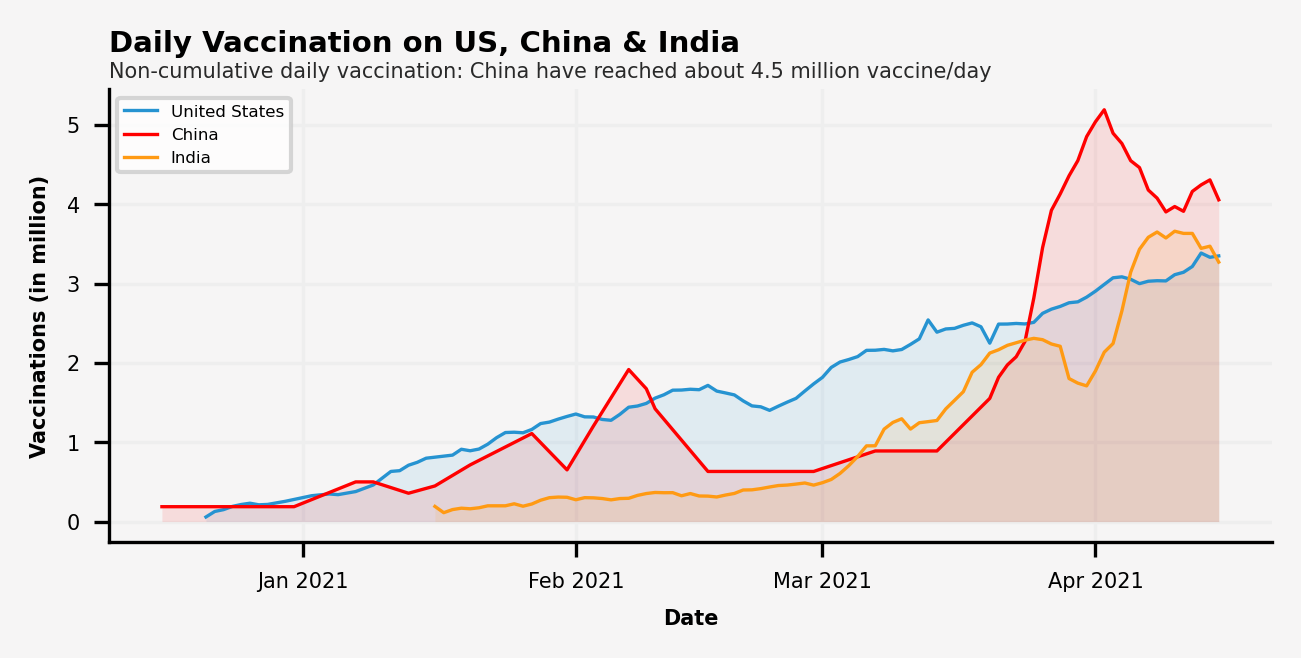

In [198]:
united_states = data[data['country']=='United States']
china = data[data['country']=='China']
india = data[data['country']=='India']

background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-10'), 5.85, 'Daily Vaccination on US, China & India', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-10'), 5.8, 'Non-cumulative daily vaccination: China have reached about 4.5 million vaccine/day', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=united_states['date'], y=united_states['daily_vaccinations']/1000000, color='#2693d1',zorder=2, linewidth=0.8)
ax0_sns = sns.lineplot(ax=ax0, x=china['date'], y=china['daily_vaccinations']/1000000, zorder=2, color='#FF0000', linewidth=0.8)
ax0_sns = sns.lineplot(ax=ax0, x=india['date'], y=india['daily_vaccinations']/1000000, zorder=2, color='#ff9a13', linewidth=0.8)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.legend(['United States', 'China', 'India'], prop={'size': 4})
ax0.fill_between(united_states['date'], united_states['daily_vaccinations']/1000000, color='#2693d1', zorder=2, alpha=0.1, linewidth=0)
ax0.fill_between(china['date'], china['daily_vaccinations']/1000000, color='#FF0000', zorder=2, alpha=0.1, linewidth=0)
ax0.fill_between(india['date'], india['daily_vaccinations']/1000000, color='#ff9a13', zorder=2, alpha=0.1, linewidth=0)

plt.show()

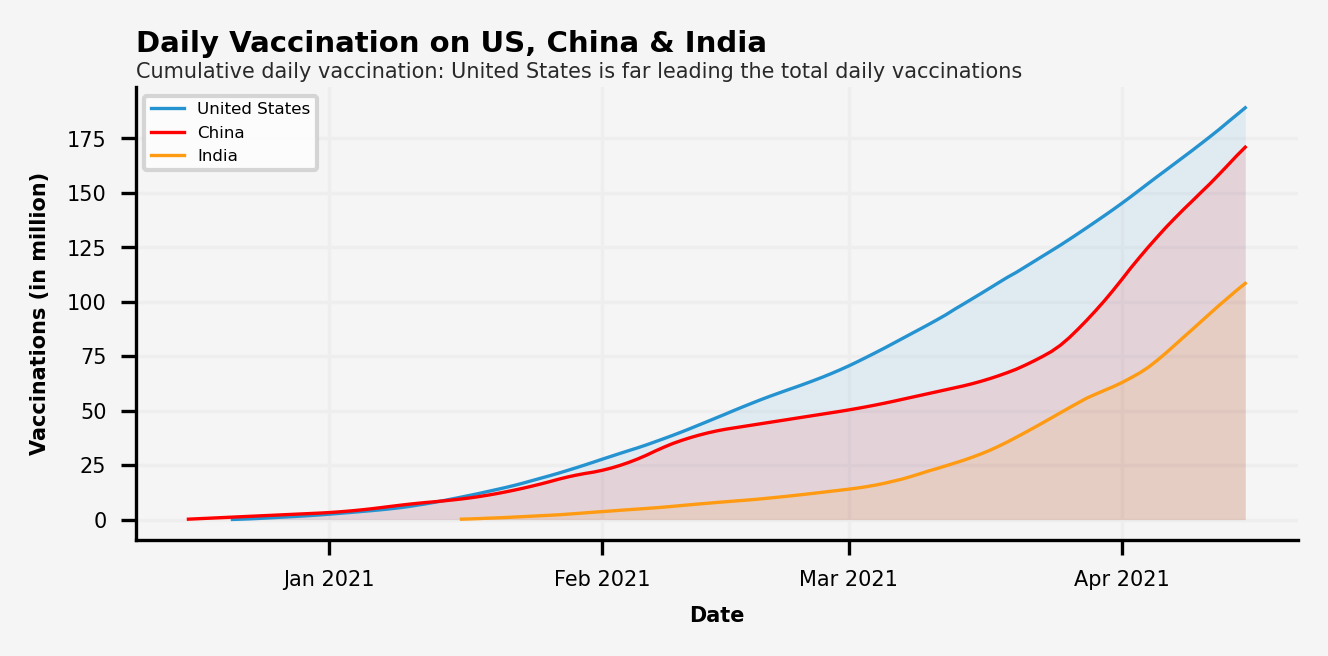

In [429]:
united_states = data[data['country']=='United States']
china = data[data['country']=='China']
india = data[data['country']=='India']

background_color = "#f6f5f5"

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)

ax0.text(pd.Timestamp('2020-12-10'), 212, 'Daily Vaccination on US, China & India', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(pd.Timestamp('2020-12-10'), 210, 'Cumulative daily vaccination: United States is far leading the total daily vaccinations', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=united_states['date'], y=united_states['daily_vaccinations'].cumsum()/1000000, color='#2693d1',zorder=2, linewidth=0.8)
ax0_sns = sns.lineplot(ax=ax0, x=china['date'], y=china['daily_vaccinations'].cumsum()/1000000, zorder=2, color='#FF0000', linewidth=0.8)
ax0_sns = sns.lineplot(ax=ax0, x=india['date'], y=india['daily_vaccinations'].cumsum()/1000000, zorder=2, color='#ff9a13', linewidth=0.8)

ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.legend(['United States', 'China', 'India'], prop={'size': 4})
ax0.fill_between(united_states['date'], united_states['daily_vaccinations'].cumsum()/1000000, color='#2693d1', zorder=2, alpha=0.1, linewidth=0)
ax0.fill_between(china['date'], china['daily_vaccinations'].cumsum()/1000000, color='#FF0000', zorder=2, alpha=0.1, linewidth=0)
ax0.fill_between(india['date'], india['daily_vaccinations'].cumsum()/1000000, color='#ff9a13', zorder=2, alpha=0.1, linewidth=0)

plt.show()

In [199]:
data = pd.read_csv('vaccination.csv')
vaccine = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

trace = go.Choropleth(
            locations = vaccine['Country'],
            locationmode='country names',
            z = vaccine['People fully vaccinated'],
            text = vaccine['Country'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'blues',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Fully vaccinated people',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Fully vaccinated people in the world',
    title_x = 0.5,
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [434]:
data = pd.read_csv('vaccination.csv')
vaccine = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

trace = go.Choropleth(
            locations = vaccine['Country'],
            locationmode='country names',
            z = vaccine['People vaccinated'],
            text = vaccine['Country'],
            autocolorscale =False,
            reversescale = False,
            colorscale = 'blues',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Number',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of vaccinated people in the world (China lacks such data)',
    title_x = 0.5,
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

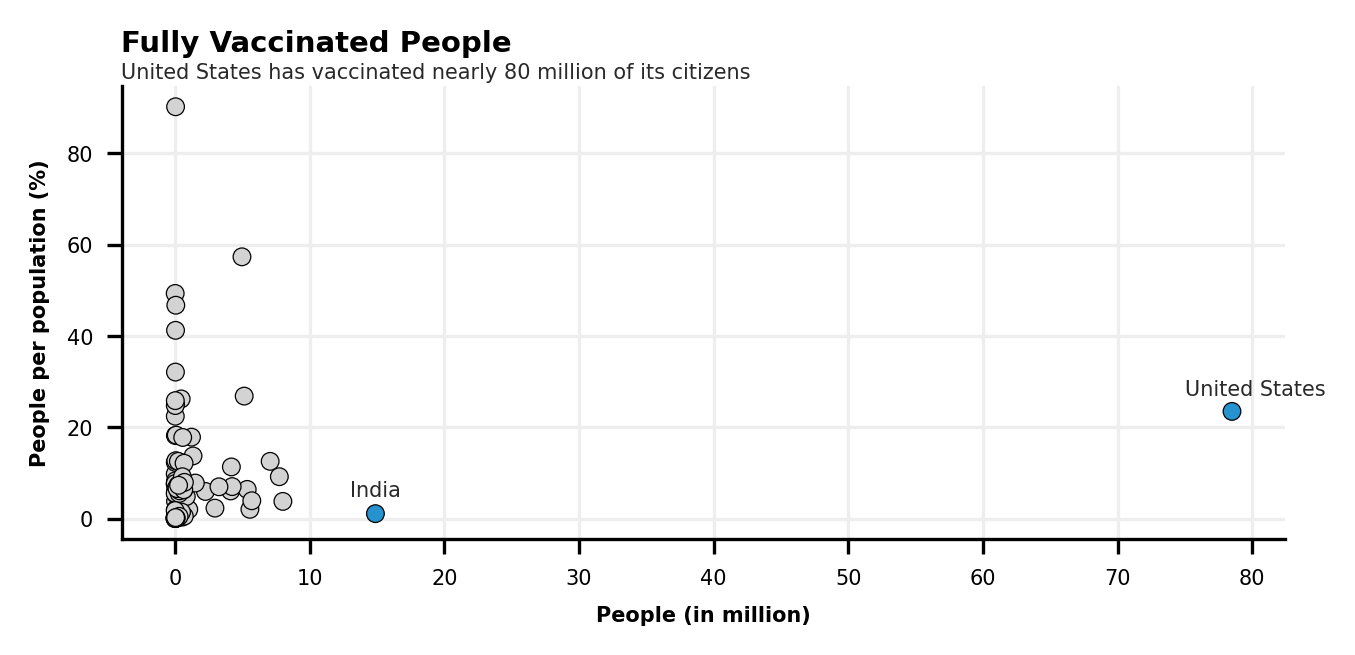

In [8]:
# background_color = "#f6f5f5"

color_map = ["lightgray" for _ in range(2)]
color_map[1] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))
value_list = ['United States', 'India']
boolean_series = data_ld.country.isin(value_list)
data_ld['color'] = boolean_series

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
# ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-4, 101, 'Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-4, 100, 'United States has vaccinated nearly 80 million of its citizens', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(75, 26, 'United States', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(13, 4, 'India', color='#292929', fontsize=5, ha='left', va='bottom')
ax0_sns = sns.scatterplot(ax=ax0, y=data_ld['people_fully_vaccinated_per_hundred'], x=data_ld['people_fully_vaccinated']/1000000, 
                          zorder=2, linewidth=0.3, edgecolor='black', hue=data_ld['color'], legend=False, size=1)
ax0_sns.set_xlabel("People (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

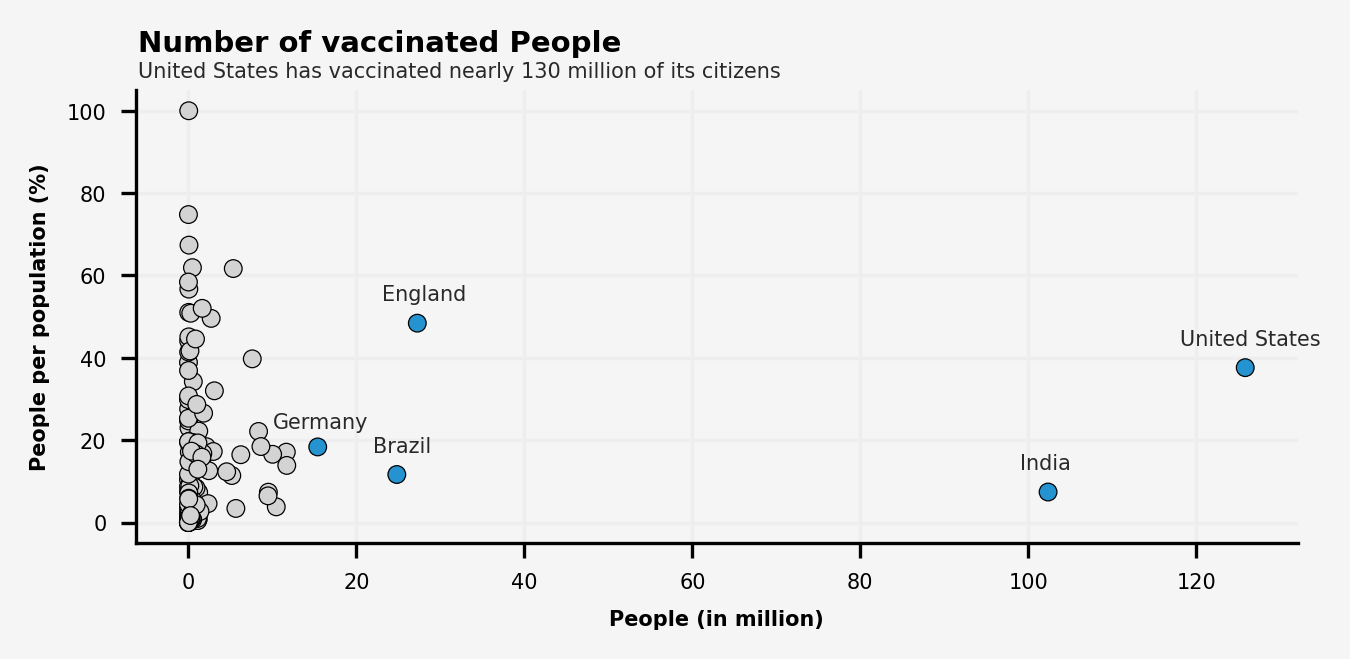

In [443]:
background_color = "#f6f5f5"

color_map = ["lightgray" for _ in range(2)]
color_map[1] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))
value_list = ['United States', 'India', 'England', 'Brazil', 'Germany']
boolean_series = data_ld.country.isin(value_list)
data_ld['color'] = boolean_series

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-6, 113, 'Number of vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-6, 112, 'United States has vaccinated nearly 130 million of its citizens', color='#292929', fontsize=5, ha='left', va='top')
ax0.text(118, 42, 'United States', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(99, 12, 'India', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(23, 53, 'England', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(22, 16, 'Brazil', color='#292929', fontsize=5, ha='left', va='bottom')
ax0.text(10, 22, 'Germany', color='#292929', fontsize=5, ha='left', va='bottom')
ax0_sns = sns.scatterplot(ax=ax0, y=data_ld['people_vaccinated_per_hundred'], x=data_ld['people_vaccinated']/1000000, 
                          zorder=2, linewidth=0.3, edgecolor='black', hue=data_ld['color'], legend=False, size=1)
ax0_sns.set_xlabel("People (in million)",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

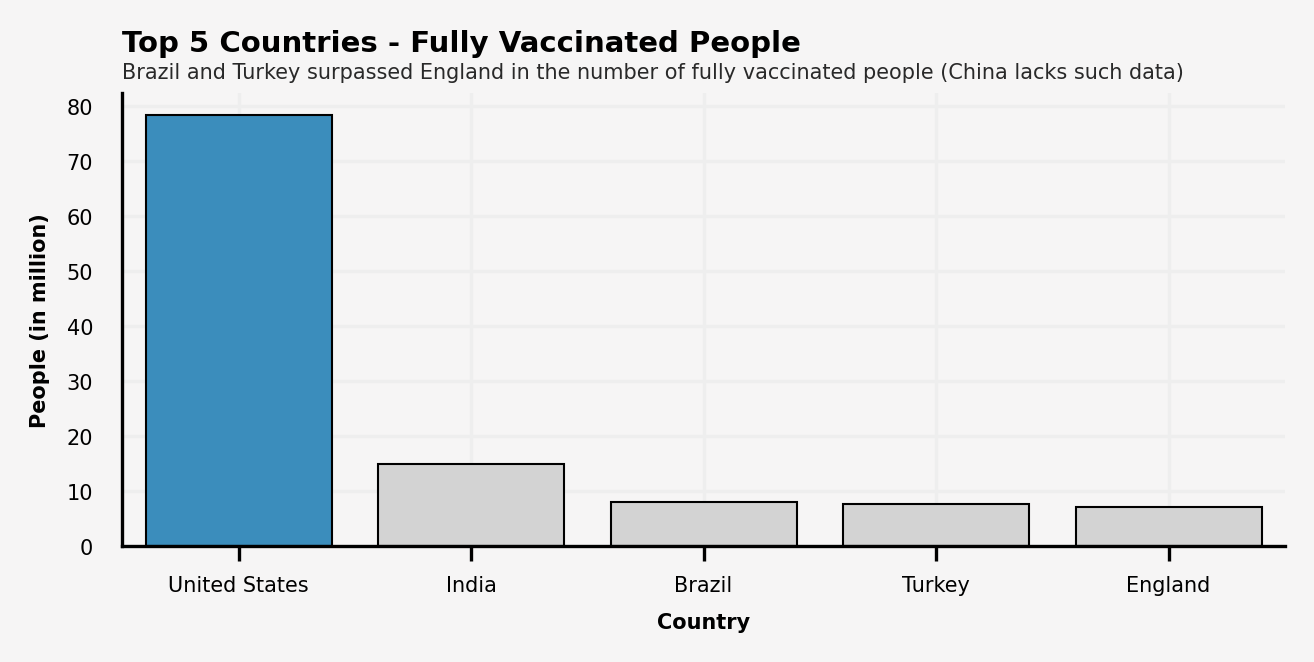

In [208]:
top5_countries_fully_vaccinated = data_ld.sort_values('people_fully_vaccinated', ascending=False)
top5_countries_fully_vaccinated = top5_countries_fully_vaccinated[:5]
top5_countries_fully_vaccinated

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 89, 'Top 5 Countries - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 88, 'Brazil and Turkey surpassed England in the number of fully vaccinated people (China lacks such data)', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_fully_vaccinated['country'], y=top5_countries_fully_vaccinated['people_fully_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

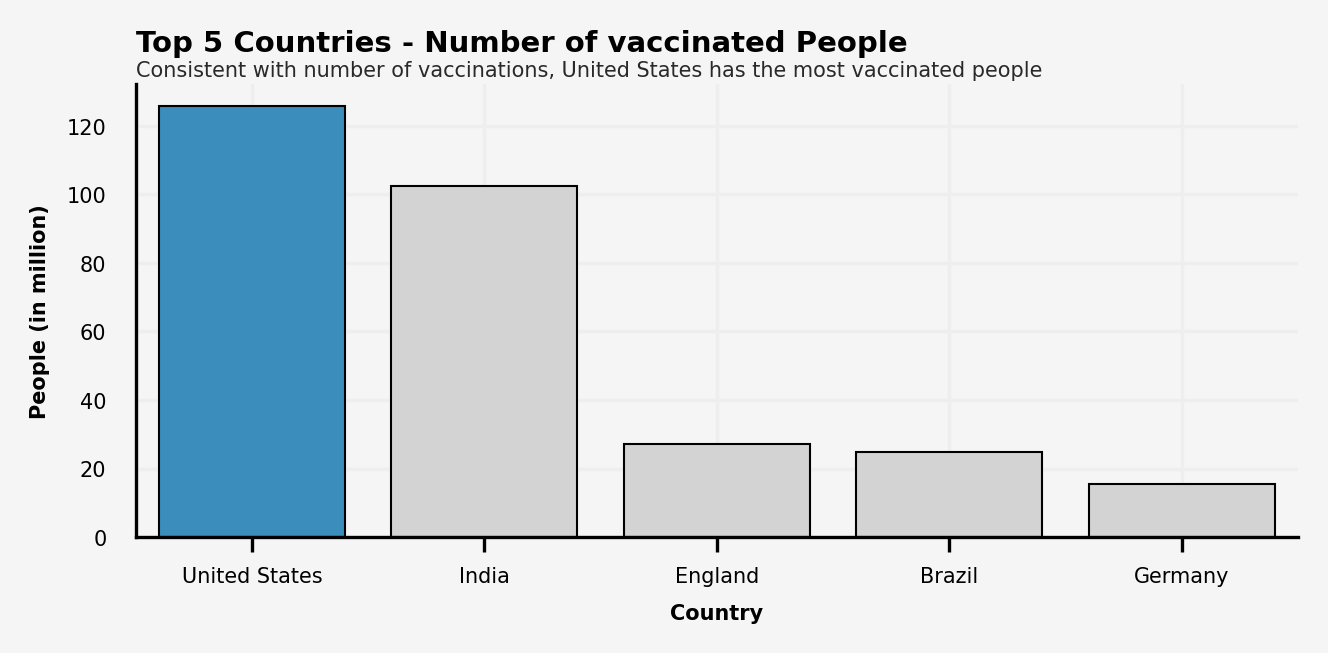

In [449]:
top5_countries_vaccinated = data_ld.sort_values('people_vaccinated', ascending=False)
top5_countries_vaccinated = top5_countries_vaccinated[:5]
top5_countries_vaccinated

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 140, 'Top 5 Countries - Number of vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 139, 'Consistent with number of vaccinations, United States has the most vaccinated people', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=top5_countries_vaccinated['country'], y=top5_countries_vaccinated['people_vaccinated']/1000000, 
                      zorder=2, linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

In [179]:
# data = pd.read_csv('vaccination.csv')
# vaccine = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
#                                                                        'total_vaccinations_per_hundred',
#                                                                       'daily_vaccinations',
#                                                                       'daily_vaccinations_per_million',
#                                                                       'people_vaccinated',
#                                                                       'people_vaccinated_per_hundred',
#                                                                        'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
#                                                                       ].max().reset_index()
# vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
#                            "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
#                            'People fully vaccinated', 'People fully vaccinated percent']

# trace = go.Choropleth(
#             locations = vaccine['Country'],
#             locationmode='country names',
#             z = vaccine['People fully vaccinated percent'],
#             text = vaccine['Country'],
#             autocolorscale =False,
#             reversescale = False,
#             colorscale = 'blues',
#             marker = dict(
#                 line = dict(
#                     color = 'rgb(0,0,0)',
#                     width = 0.5)
#             ),
#             colorbar = dict(
#                 title = 'Percentage %',
#                 tickprefix = '')
#         )

# data = [trace]
# layout = go.Layout(
#     title = 'Percentage of fully vaccinated people in the world',
#     title_x = 0.5,
#     geo = dict(
#         showframe = True,
#         showlakes = False,
#         showcoastlines = True,
#         projection = dict(
#             type = 'natural earth'
#         )
#     )
# )

# fig = dict( data=data, layout=layout )
# iplot(fig)

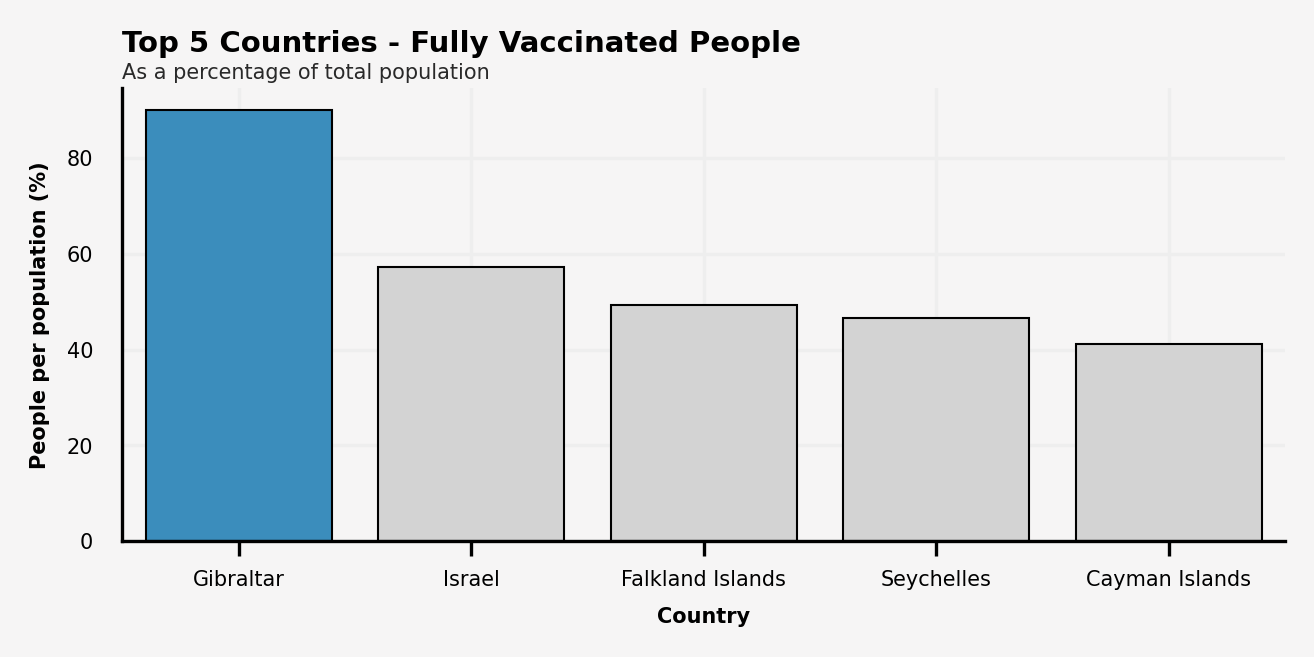

In [407]:
fully_vaccinated_5 = data_ld.sort_values('people_fully_vaccinated_per_hundred', ascending=False).reset_index(drop=True).loc[0:4, :]

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 101, 'Top 5 Countries - Fully Vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 100, 'As a percentage of total population', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=fully_vaccinated_5['country'], y=fully_vaccinated_5['people_fully_vaccinated_per_hundred'], 
                      zorder=2, linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

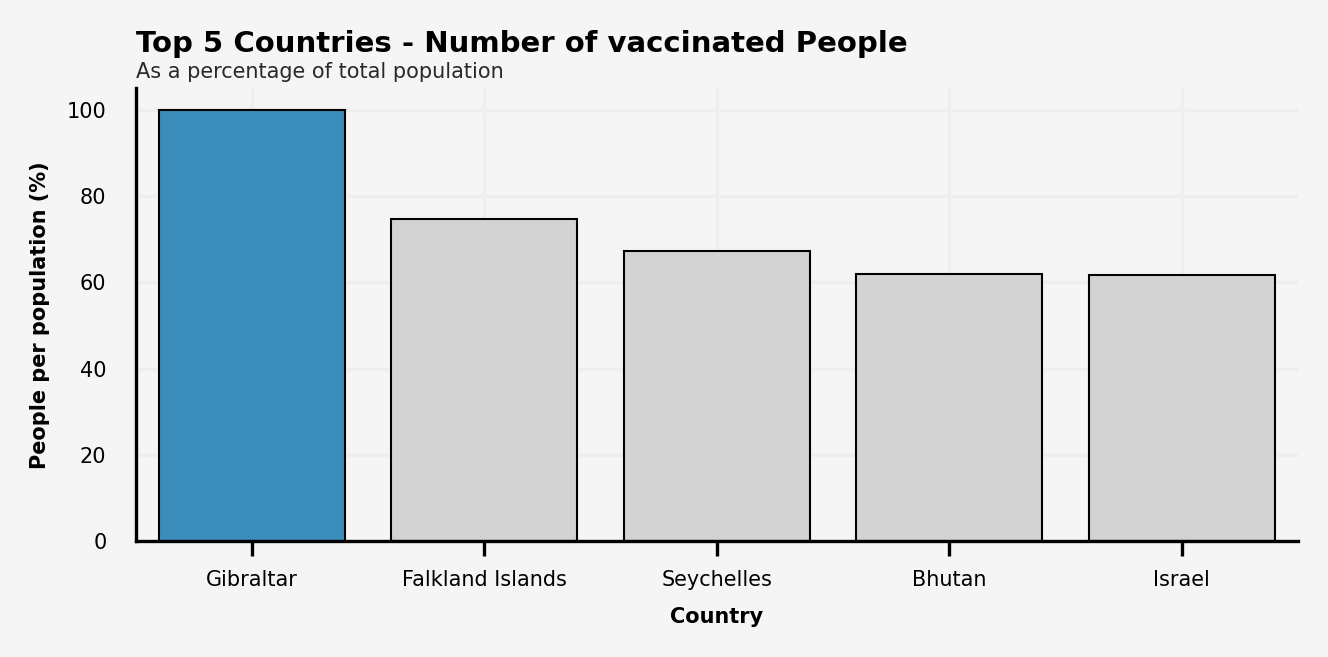

In [451]:
fully_vaccinated_5 = data_ld.sort_values('people_vaccinated_per_hundred', ascending=False).reset_index(drop=True).loc[0:4, :]

background_color = "#f6f5f5"
color_map = ["lightgray" for _ in range(5)]
color_map[0] = "#2693d1"
sns.set_palette(sns.color_palette(color_map))

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0.text(-0.5, 112, 'Top 5 Countries - Number of vaccinated People', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-0.5, 111, 'As a percentage of total population', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.barplot(ax=ax0, x=fully_vaccinated_5['country'], y=fully_vaccinated_5['people_vaccinated_per_hundred'], 
                      zorder=2, linewidth=0.5, edgecolor='black')
ax0_sns.set_xlabel("Country",fontsize=5, weight='bold')
ax0_sns.set_ylabel("People per population (%)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)

plt.show()

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
data2 = pd.read_csv("vaccination_china.csv")
data2 = data2.reset_index()
data2['date'] = pd.to_datetime(data2['date'])

In [282]:
X = data2['index'].values.reshape(-1,1)
y = data2['total_vaccinations'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 80.27 + 4.3966X


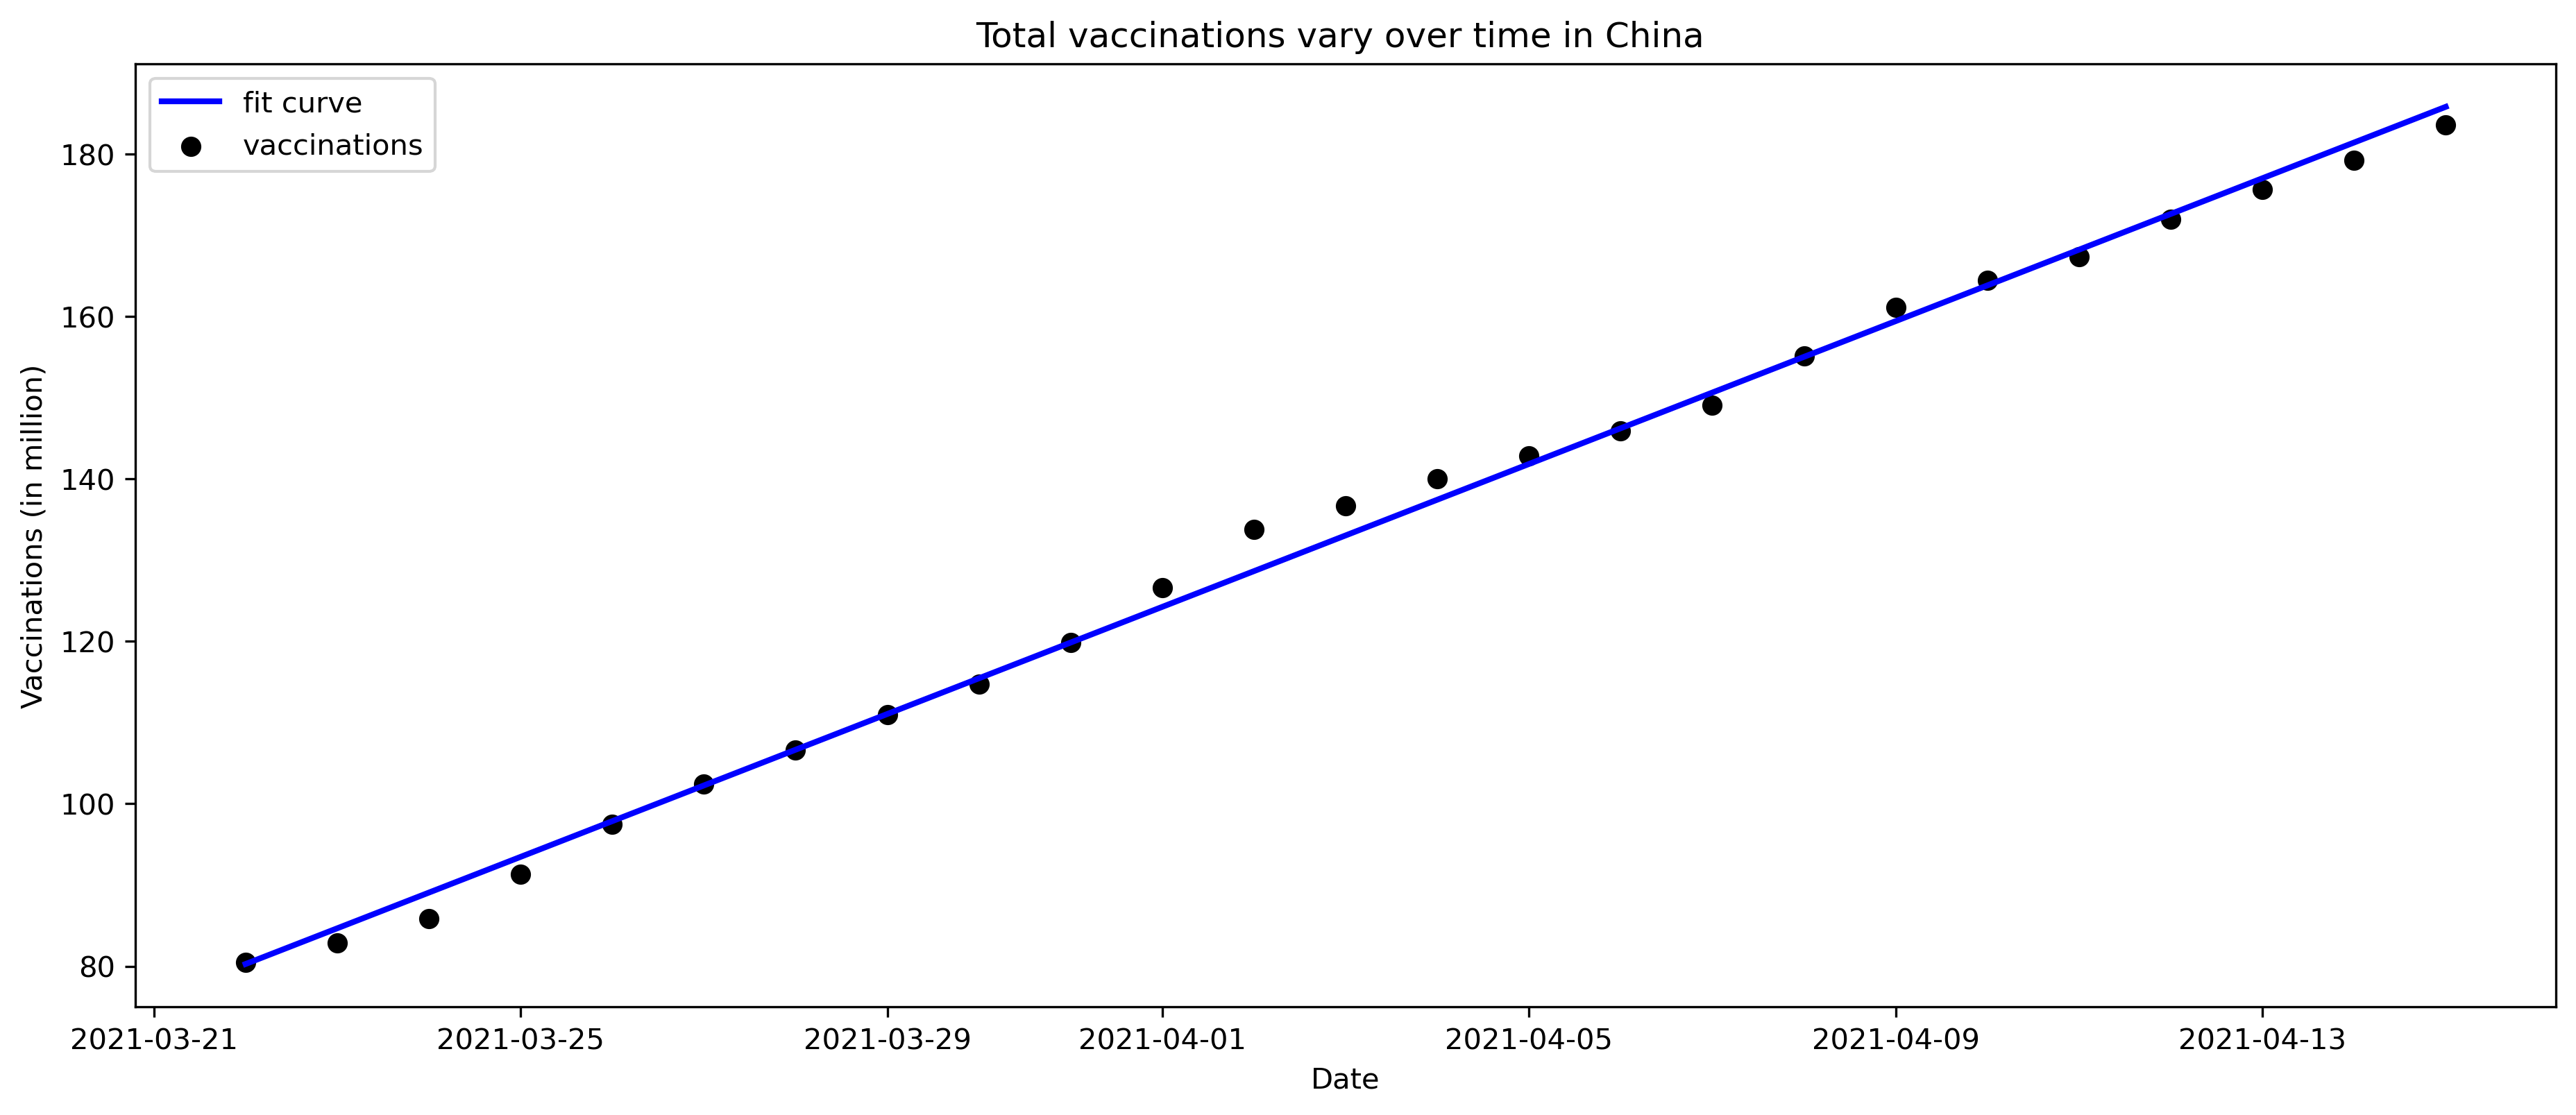

In [396]:
predictions = reg.predict(X)

fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1, 1, 1) 
 
ax.scatter(data2['date'], data2['total_vaccinations'], color='black',label="vaccinations")
ax.set_title("Total vaccinations vary over time in China ")
ax.set_xlabel("Date")
ax.set_ylabel("Vaccinations (in million)")

ax.plot(data2['date'], predictions, color="blue", linewidth=2, label="fit curve")
ax.legend()

In [216]:
X = data['index']
y = data['total_vaccinations']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     total_vaccinations   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6373.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.29e-29
Time:                        08:35:59   Log-Likelihood:                -51.581
No. Observations:                  25   AIC:                             107.2
Df Residuals:                      23   BIC:                             109.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2701      0.771    104.104      0.0

In [307]:
x_new = np.linspace(0,210)
y_predict = reg.predict(x.reshape(-1,1))

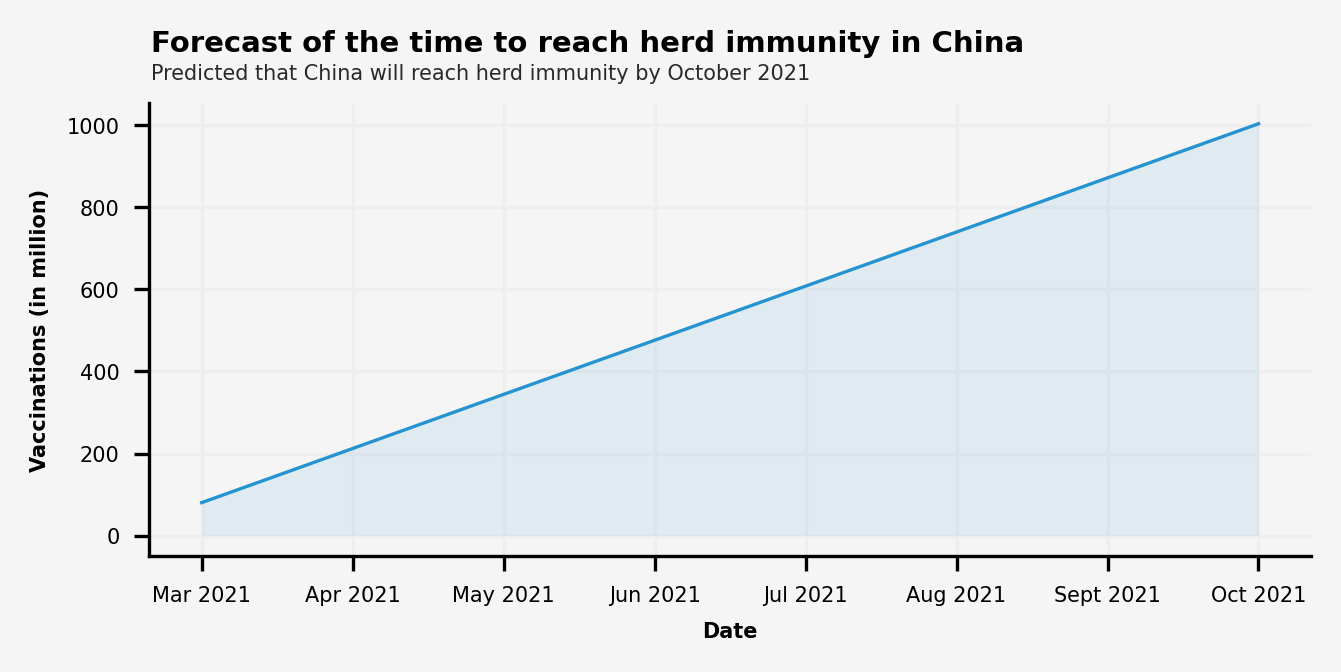

In [393]:
predictions = reg.predict(X)

background_color = "#f6f5f5"

plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.text(-10, 1165, 'Forecast of the time to reach herd immunity in China', color='black', fontsize=7, ha='left', va='bottom', weight='bold')
ax0.text(-10, 1150, 'Predicted that China will reach herd immunity by October 2021', 
         color='#292929', fontsize=5, ha='left', va='top')
ax0_sns = sns.lineplot(ax=ax0, x=x_new, y=y_predict.flatten(), zorder=2, color='#2693d1', linewidth=0.8)
ax0_sns.set_xlabel("Date",fontsize=5, weight='bold')
ax0.set_xticks([0,30,60,90,120,150,180,210])
ax0.set_xticklabels(['Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sept 2021', 'Oct 2021'], fontsize=10)
ax0_sns.set_ylabel("Vaccinations (in million)",fontsize=5, weight='bold')
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0_sns.tick_params(labelsize=5)
ax0.fill_between(x_new, y_predict.flatten(), color='#2693d1', zorder=2, alpha=0.1, linewidth=0)
plt.show()